In [5]:
import pandas as pd
from pathlib import Path
from bitcoin_risk.risk import prepare_and_compute_risk

# complete data-range
start = pd.to_datetime('2015-08-03')
end = pd.to_datetime('2024-11-30')
future = pd.to_datetime('2034-11-30')
last_date = '2024-11-30'

# result directory
current_dir = Path.cwd()
# path = current_dir / "eth" / last_date
path = current_dir / "docs" / "eth" / last_date
if not path.exists():
    path.mkdir(parents=True) 

df = prepare_and_compute_risk('data/INDEX_ETHUSD.csv', start, end, future, last_date)
# display(df)
from bitcoin_risk.plotter import create_figures
fig1, fig2, fig3, fig4 = create_figures(df, path)
fig1.show(); fig2.show(); fig3.show(); fig4.show()

date  usd           fit   undervalued    overvalued        bubble  \
0    2015-08-03  3.0      0.335589      0.117769      1.076526      2.903008   
1    2015-08-04  3.0      0.343358      0.120681      1.100151      2.961045   
2    2015-08-05  3.0      0.351239      0.123640      1.124092      3.019747   
3    2015-08-06  3.0      0.359235      0.126646      1.148350      3.079113   
4    2015-08-07  3.0      0.367344      0.129700      1.172927      3.139148   
...         ...  ...           ...           ...           ...           ...   
7055 2034-11-26  NaN  24558.224592  18317.434300  44292.104092  46818.935677   
7056 2034-11-27  NaN  24567.577297  18324.879955  44308.104830  46834.358150   
7057 2034-11-28  NaN  24576.932259  18332.327598  44324.109118  46849.783554   
7058 2034-11-29  NaN  24586.289479  18339.777230  44340.116955  46865.211887   
7059 2034-11-30  NaN  24595.648958  18347.228850  44356.128343  46880.643151   

               top   time-risk      risk        ddt  
0         5.679432  146.171104  0.835331        NaN  
1         5.784945  145.171104  0.830318        NaN  
2         5.891518  144.171104  0.825331        NaN  
3         5.999151  143.171104  0.820371        NaN  
4         6.107847  142.171104  0.815435        NaN  
...            ...         ...       ...        ...  
7055  46451.179570         NaN       NaN  15.332562  
7056  46465.408367         NaN       NaN  15.330208  
7057  46479.639538         NaN       NaN  15.327855  
7058  46493.873085         NaN       NaN  15.325502  
7059  46508.109006         NaN       NaN  15.323150  

[7060 rows x 10 columns]

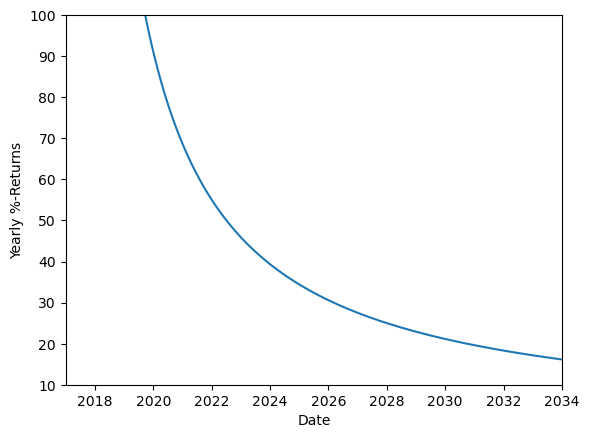

In [4]:
import pandas as pd
from pathlib import Path
from bitcoin_risk.risk import prepare_and_compute_risk
from bitcoin_risk.risk import _unix_to_btc_time, _bitcoin_time
import numpy as np

# complete data-range
start = pd.to_datetime('2015-08-03')
end = pd.to_datetime('2024-11-30')
future = pd.to_datetime('2034-11-30')
last_date = '2024-11-30'

# result directory
current_dir = Path.cwd()
path = current_dir / "docs" / "eth" / last_date
if not path.exists():
    path.mkdir(parents=True) 

# btc = prepare_and_compute_risk('data/BTCUSD_2024_12_24.csv', start, end, future, last_date)
df = prepare_and_compute_risk('data/INDEX_ETHUSD.csv', start, end, future, last_date)

def _evaluate_fit(fit, date):
    # date -> btc-time
    x = pd.to_datetime(date)
    x = x.apply(lambda x: x.timestamp())
    x = _unix_to_btc_time(x)
    x = np.log(x)
    return fit[0] * np.exp(fit[0] * x + fit[1])


def btc_fit(btc, dates, price):
    """
    Performs a logscale linear fit on the Bitcoin price data to predict future prices.

    Parameters:
    - dates (pd.Series): A series of dates for which the Bitcoin prices are known.
    - price (pd.Series): A series of Bitcoin prices corresponding to the dates.

    Returns:
    - pd.Series: A series of predicted Bitcoin prices based on the logscale linear fit.
    """
    t = _bitcoin_time(dates)
    t = np.log(t)
    y = np.log(price)
    btc_fit = np.polyfit(t, y, 1)
    return _evaluate_fit(btc_fit, btc['date'])


df['ddt'] = ((df['fit'] / df['fit'].shift(365)) - 1) * 100.
display(df)

import matplotlib.pyplot as plt
plt.plot(df['date'], df['ddt'])
# plt.yscale('log')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2034-01-01'))
plt.ylim((1e1, 1e2))
plt.xlabel("Date")
plt.ylabel("Yearly %-Returns")
plt.show()